<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/BUOI9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 16.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import matplotlib.pyplot as plt

In [10]:
from mtcnn import MTCNN


In [12]:
url = '/content/a.jpg'
pixels = plt.imread(url)
detector = MTCNN ()
faces = detector.detect_faces (pixels)
for face in faces:
  print(face)

2/2 [==============================] - 0s 43ms/step
{'box': [1076, 348, 64, 86], 'confidence': 0.9999904036521912, 'keypoints': {'left_eye': (1092, 383), 'right_eye': (1120, 383), 'nose': (1106, 399), 'mouth_left': (1096, 416), 'mouth_right': (1117, 417)}}
{'box': [940, 323, 63, 84], 'confidence': 0.9999720454216003, 'keypoints': {'left_eye': (955, 354), 'right_eye': (984, 355), 'nose': (967, 369), 'mouth_left': (956, 386), 'mouth_right': (981, 387)}}
{'box': [821, 320, 68, 94], 'confidence': 0.9999670386314392, 'keypoints': {'left_eye': (837, 356), 'right_eye': (867, 357), 'nose': (850, 375), 'mouth_left': (838, 391), 'mouth_right': (863, 392)}}
{'box': [1548, 357, 51, 72], 'confidence': 0.9999182820320129, 'keypoints': {'left_eye': (1573, 385), 'right_eye': (1596, 383), 'nose': (1594, 400), 'mouth_left': (1576, 413), 'mouth_right': (1595, 411)}}
{'box': [1161, 356, 61, 82], 'confidence': 0.999755859375, 'keypoints': {'left_eye': (1176, 388), 'right_eye': (1204, 388), 'nose': (1189, 4

4/4 [==============================] - 0s 34ms/step


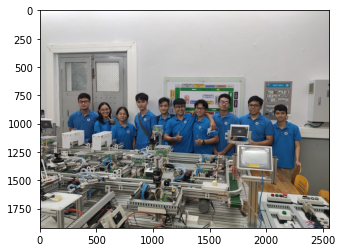

In [19]:

from mtcnn import MTCNN
url='/content/b.jpg'
pixels=plt.imread(url)
detector=MTCNN()
faces=detector.detect_faces(pixels)
plt.imshow(pixels)

4/4 [==============================] - 1s 62ms/step


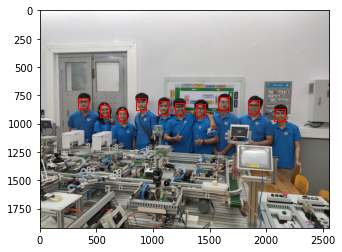

In [28]:
anhtest = '/content/b.jpg'
pixels= plt.imread(anhtest)
detector= MTCNN()
face= detector.detect_faces(pixels)
plt.imshow(pixels)
ax= plt.gca()
for face in faces:
  x,y,width,height= face['box']
  rect= plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
plt.show()

1/1 [==============================] - 0s 141ms/step


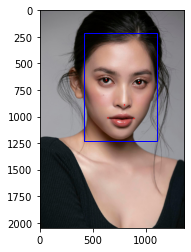

In [30]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from keras.utils import load_img,img_to_array
url = '/content/tiey.jpeg'
pixels = plt.imread(url)
detector = MTCNN()
faces = detector.detect_faces(pixels)
data = plt.imshow(pixels)
ax = plt.gca()
for face in faces:
  x, y, width, height = face['box']
  rect = plt.Rectangle((x,y),width,height,
                       fill = False, color= 'blue')
  ax.add_patch(rect)
  for key, value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2,color = 'red')
    ax.add_patch(dot)
plt.show()

1/1 [==============================] - 0s 441ms/step


1/1 [==============================] - 0s 141ms/step


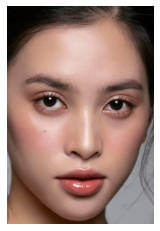

In [35]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_faces(filename, result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x,y,width,height = result_list[i]['box']
    x1,y1 = x + width, y + height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y:y1,x:x1])
  plt.show()

filename = '/content/tiey.jpeg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename,faces)

1/1 [==============================] - 0s 318ms/step


2/2 [==============================] - 0s 62ms/step


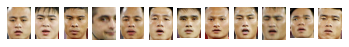

In [36]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def draw_faces(filename, result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x,y,width,height = result_list[i]['box']
    x1,y1 = x + width, y + height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y:y1,x:x1])
  plt.show()

filename = '/content/a.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename,faces)

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [41]:
model = ResNet50(weights='imagenet')

img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02123597', 'Siamese_cat', 0.96151173), ('n02127052', 'lynx', 0.016537603), ('n02123394', 'Persian_cat', 0.013184776)]


In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path = '/content/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
plt.show()

1/1 [==============================] - 1s 1s/step
Predicted: [[('n02110063', 'malamute', 0.6875528), ('n02109961', 'Eskimo_dog', 0.20363718), ('n02091467', 'Norwegian_elkhound', 0.06455959), ('n02110185', 'Siberian_husky', 0.041101392), ('n02110806', 'basenji', 0.0012344177)]]


In [47]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 646ms/step


In [48]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

1/1 [==============================] - 1s 814ms/step
